In [51]:
import pandas as pd
file_path = 'path_to_your_file.csv'
penguins_data = pd.read_csv("C:\\Users\\user\\Downloads\\Random\\randomwalk-ds-assessment-level2\\dataset.csv")

In [49]:
# View the first few rows of the dataset
print(data.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
3          NaN     NaN  
4       3450.0  female  


In [7]:
# Check the number of rows and columns in the dataset
dimensions = penguins_data.shape
print(f"The dataset has {dimensions[0]} rows and {dimensions[1]} columns.")


The dataset has 344 rows and 7 columns.


In [53]:
data_info = penguins_data.info()
print(data_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


## Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it.

In [6]:
# Check for missing values
missing_values = penguins_data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64


### What it does:
- Counts the number of missing (NaN) values in each column using isnull().sum().
### Why it's important:
- Identifies columns with missing data, so appropriate preprocessing methods can be applied. 

In [8]:
# Fill missing numerical values with the median
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_data[num_cols] = penguins_data[num_cols].fillna(penguins_data[num_cols].median())

### What it does:
- selects the numerical columns to clean.
- Replaces missing values in these columns with the median of each column using .fillna().
### Why median is used:
- The median is robust against outliers and represents the central tendency of the data effectively, preserving the distribution.

In [9]:
# Fill missing categorical values with the mode
penguins_data['sex'] = penguins_data['sex'].fillna(penguins_data['sex'].mode()[0])

### What it does:
- Replaces missing values in the categorical column sex with the mode (most frequent value).
### Why mode is used:
- The mode preserves the natural distribution of the data while minimizing disruption, as it’s the most common category.


In [10]:
# Confirm all missing values are handled
print("Missing values after cleaning:\n", penguins_data.isnull().sum())

Missing values after cleaning:
 species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


### What it does:
- Re-checks for any remaining missing values to confirm that all have been addressed. The expected output is zero missing values for all columns.

### Key Takeaways
- Numerical Values: Median ensures the central value is preserved, even with outliers.
- Categorical Values: Mode retains the most common category, maintaining data consistency.

## Q2: What is the average body_mass_g for Gentoo penguins?

In [11]:
# Calculate the average body_mass_g for Gentoo penguins
gentoo_avg_body_mass = penguins_data[penguins_data['species'] == 'Gentoo']['body_mass_g'].mean()
print("Average body mass for Gentoo penguins:", gentoo_avg_body_mass)

Average body mass for Gentoo penguins: 5125.0


## Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species.

In [37]:
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate skewness and kurtosis
species_groups = penguins_data.groupby('species')
distribution_analysis = {}

for feature in ['bill_length_mm', 'bill_depth_mm']:
    distribution_analysis[feature] = species_groups[feature].agg(['mean', 'std', skew, kurtosis])


#### What happens here?
The dataset is grouped by the species column, creating subsets for each species.
For each feature, the following statistics are calculated:
- Mean: Average of the feature values within each species.
- Standard Deviation (std): Spread of the data around the mean.
#### Skewness: Asymmetry of the distribution.
- Positive skewness: A longer right tail (data concentrated on the left).
- Negative skewness: A longer left tail (data concentrated on the right).
#### Kurtosis: Tailedness of the distribution.
- High kurtosis (>3): Heavy tails with potential outliers.
- Low kurtosis (<3): Light tails.

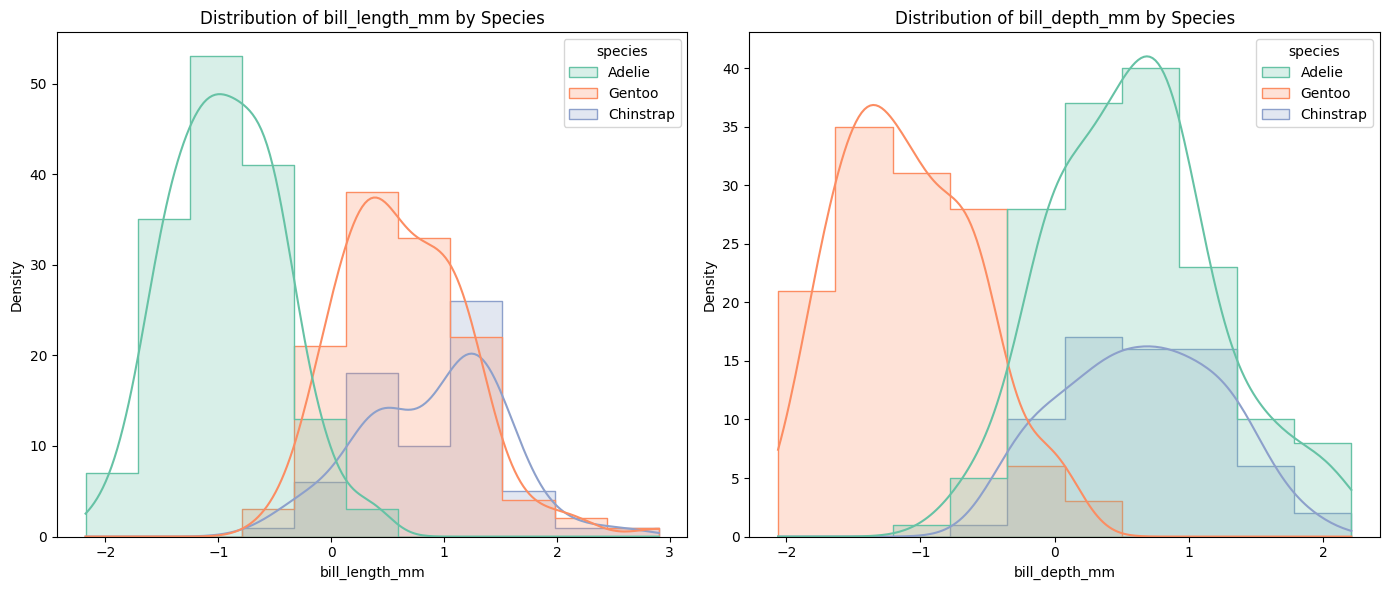

In [38]:
# Plot distributions
plt.figure(figsize=(14, 6))

for i, feature in enumerate(['bill_length_mm', 'bill_depth_mm'], 1):
    plt.subplot(1, 2, i)
    sns.histplot(data=penguins_data, x=feature, hue='species', kde=True, element="step", palette="Set2")
    plt.title(f'Distribution of {feature} by Species')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

### Visualization Explanation:
#### Histograms with KDE (Kernel Density Estimate):
- Combines histograms and smooth density curves to illustrate how the values are distributed for bill_length_mm and bill_depth_mm.
#### Species-specific Analysis:
- Data is grouped by species (color-coded using the hue parameter), allowing for a direct comparison of distributions across species.

In [36]:
# Print the calculated statistics
print("Distribution Analysis (Mean, Std, Skewness, Kurtosis):")
print(distribution_analysis)

Distribution Analysis (Mean, Std, Skewness, Kurtosis):
{'bill_length_mm':                 mean       std      skew  kurtosis
species                                           
Adelie     38.826316  2.689266  0.166475 -0.224485
Chinstrap  48.804412  3.372338 -0.093203 -0.119069
Gentoo     47.378226  3.101129  0.720893  1.177040, 'bill_depth_mm':                 mean       std      skew  kurtosis
species                                           
Adelie     18.339474  1.215581  0.329567 -0.096039
Chinstrap  18.420588  1.135395  0.006726 -0.898740
Gentoo     15.000806  0.999146  0.346413 -0.584449}


- Density plots for bill_length_mm and bill_depth_mm grouped by species (Adelie, Gentoo, Chinstrap). 
- It highlights the differences in feature distributions for each species.

## Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers.

In [42]:
import numpy as np

# Using the IQR method to detect outliers
outlier_indices = {}
for col in num_cols:
    Q1 = penguins_data[col].quantile(0.25)
    Q3 = penguins_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices[col] = penguins_data[(penguins_data[col] < lower_bound) | (penguins_data[col] > upper_bound)].index

#### IQR Calculation:

- Q1 (1st Quartile): The 25th percentile of the data.
- Q3 (3rd Quartile): The 75th percentile of the data.
- IQR (Interquartile Range): Q3 - Q1, representing the middle 50% of the data.
#### Outlier Boundaries:
- Lower Bound: Q1 - 1.5 * IQR
- Upper Bound: Q3 + 1.5 * IQR
-Any data point falling outside these bounds is considered an outlier.

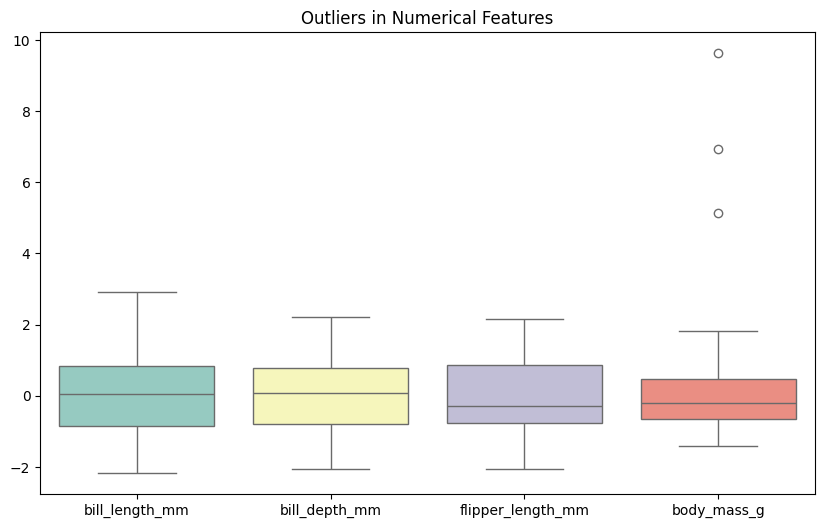

{'bill_length_mm': Index([], dtype='int64'), 'bill_depth_mm': Index([], dtype='int64'), 'flipper_length_mm': Index([], dtype='int64'), 'body_mass_g': Index([73, 206, 324], dtype='int64')}


In [39]:
# Visualizing outliers with boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=penguins_data[num_cols], palette="Set3")
plt.title("Outliers in Numerical Features")
plt.show()

print(outlier_indices)

#### Boxplot Explanation:
- A boxplot visualizing outliers for numerical features like bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g 
- Extreme points outside the whiskers represent outliers.


## Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. 

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(penguins_data[num_cols])

#### Why? 
- PCA requires data to be standardized because it is sensitive to the scale of the features.
- Features with larger ranges can dominate the principal components.
#### How? 
- The StandardScaler transforms the data by subtracting the mean and scaling it to unit variance, ensuring all features contribute equally to PCA.

In [45]:
# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

#### Why? 
- PCA identifies the directions (principal components) that capture the most variance in the dataset.
#### How?
- The PCA() model is applied to the standardized data. It computes principal components and projects the original data onto these components.

In [46]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)


Explained variance ratio: [0.61711071 0.19733481 0.13246195 0.05309253]


#### Why? 
- The explained variance ratio indicates how much information (or variance) each principal component captures from the data.
#### How? 
- This step helps evaluate how many components are needed to retain most of the information in the data.


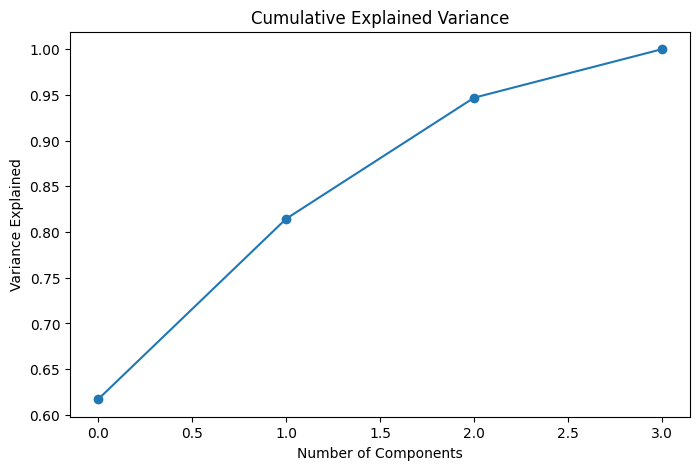

In [47]:
# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained")
plt.show()

- This plot shows the cumulative explained variance as a function of the number of principal components.
- It indicates how much variance in the data is captured by adding more components, approaching 100% with all components.


## Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them

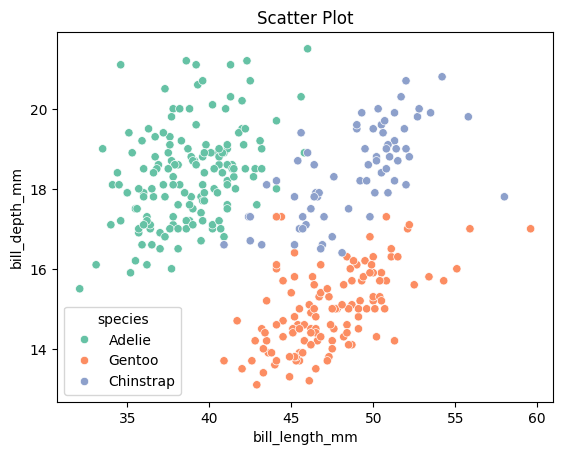

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
sns.scatterplot(data=penguins_data, x='bill_length_mm', y='bill_depth_mm', hue='species', palette="Set2")
plt.title("Scatter Plot")
plt.show()


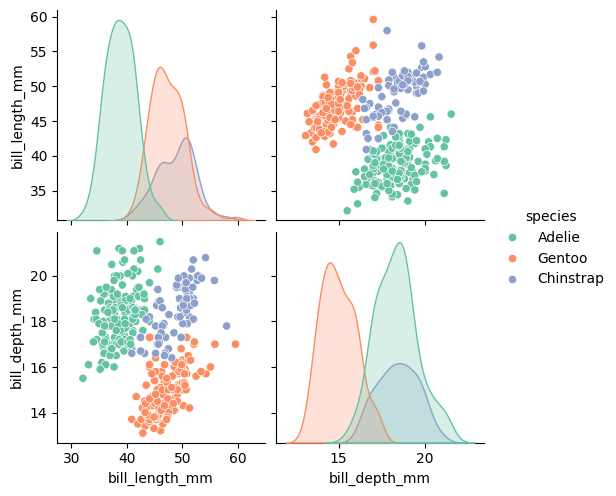

In [19]:
# Pair plot
sns.pairplot(penguins_data, vars=['bill_length_mm', 'bill_depth_mm'], hue='species', palette="Set2")
plt.show()

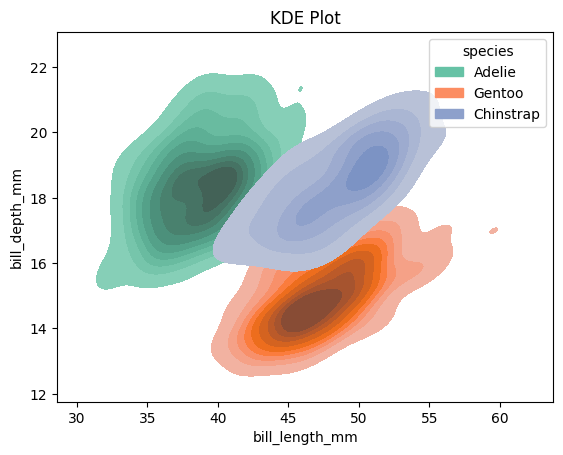

In [20]:
# KDE plot
sns.kdeplot(data=penguins_data, x='bill_length_mm', y='bill_depth_mm', hue='species', palette="Set2", fill=True)
plt.title("KDE Plot")
plt.show()

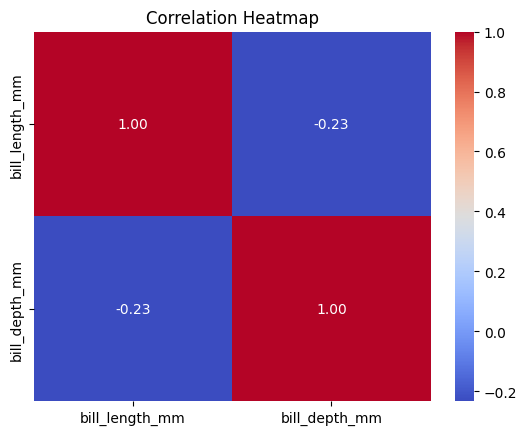

In [21]:
# Heatmap (correlation)
corr = penguins_data[['bill_length_mm', 'bill_depth_mm']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

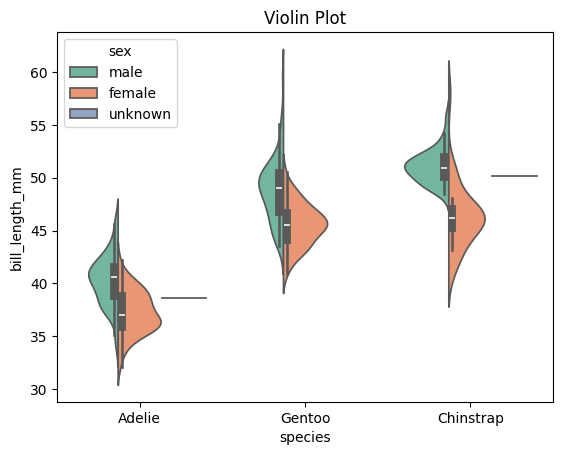

In [22]:
# Violin plot
sns.violinplot(data=penguins_data, x='species', y='bill_length_mm', hue='sex', split=True, palette="Set2")
plt.title("Violin Plot")
plt.show()


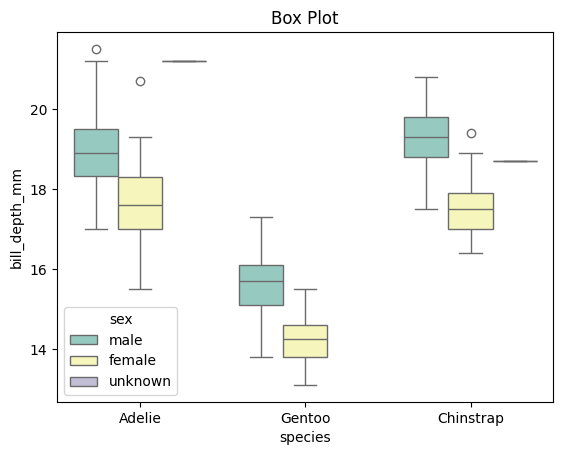

In [23]:
# Box plot
sns.boxplot(data=penguins_data, x='species', y='bill_depth_mm', hue='sex', palette="Set3")
plt.title("Box Plot")
plt.show()


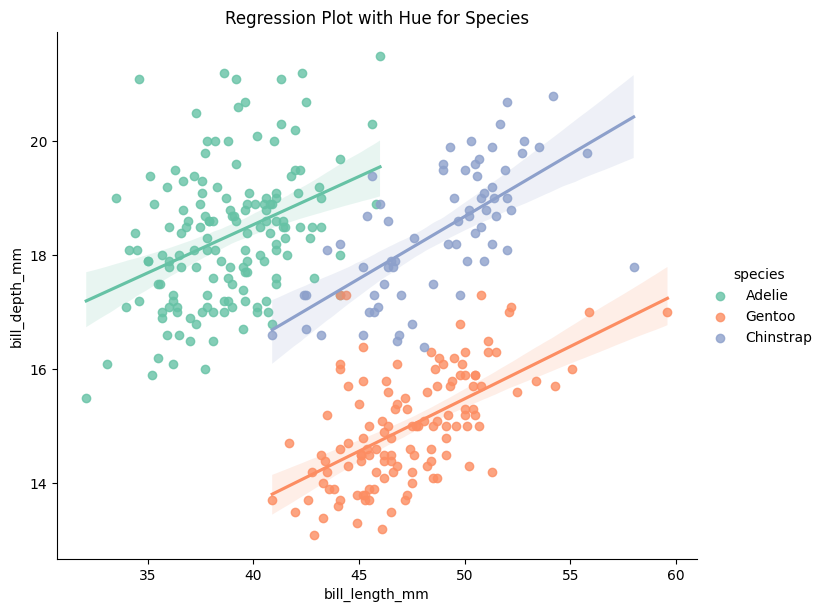

In [24]:
# Joint plot with regression (using sns.lmplot)
sns.lmplot(data=penguins_data, x='bill_length_mm', y='bill_depth_mm', hue='species', height=6, aspect=1.2, palette="Set2")
plt.title("Regression Plot with Hue for Species")
plt.show()

## Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island?

In [25]:
# Maximum flipper_length_mm for each species and island
max_flipper_lengths = penguins_data.groupby(['species', 'island'])['flipper_length_mm'].max()
print("Maximum flipper lengths by species and island:")
print(max_flipper_lengths)

Maximum flipper lengths by species and island:
species    island   
Adelie     Biscoe       203.0
           Dream        208.0
           Torgersen    210.0
Chinstrap  Dream        212.0
Gentoo     Biscoe       231.0
Name: flipper_length_mm, dtype: float64


In [28]:
# Which species has the longest flippers on each island
longest_flippers = max_flipper_lengths.reset_index().sort_values(by='flipper_length_mm', ascending=False).drop_duplicates(['island'])
print("Species with the longest flippers on each island:")
print(longest_flippers)

Species with the longest flippers on each island:
     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


## Q8: Perform z-score normalization on this dataset.

In [31]:
from scipy.stats import zscore

# Apply Z-score normalization to numerical features
penguins_data[num_cols] = penguins_data[num_cols].apply(zscore)
print("Normalized data (first 5 rows):")
print(penguins_data[num_cols].head())

Normalized data (first 5 rows):
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.883054       0.787289          -1.420541    -0.468990
1       -0.809180       0.126114          -1.063485    -0.424125
2       -0.661432       0.431272          -0.420786    -0.917634
3        0.040373       0.075255          -0.277964    -0.199803
4       -1.326299       1.092447          -0.563608    -0.738176
